<a href="https://colab.research.google.com/github/ak55634/Assignment-Visualization/blob/main/Merge_ICUSTAYS_ADMISSIONS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files
uploaded = files.upload()
import pandas as pd

# uploaded files 'ADMISSIONS.csv' and 'ICUSTAYS.csv'
admissions = pd.read_csv('ADMISSIONS.csv')
icustays = pd.read_csv('ICUSTAYS.csv')

# Display the first few rows
print(admissions.head())
print(icustays.head())



Saving ADMISSIONS.csv to ADMISSIONS.csv
Saving ICUSTAYS.csv to ICUSTAYS.csv
   ROW_ID  SUBJECT_ID  HADM_ID            ADMITTIME            DISCHTIME  \
0      21          22   165315  2196-04-09 12:26:00  2196-04-10 15:54:00   
1      22          23   152223  2153-09-03 07:15:00  2153-09-08 19:10:00   
2      23          23   124321  2157-10-18 19:34:00  2157-10-25 14:00:00   
3      24          24   161859  2139-06-06 16:14:00  2139-06-09 12:48:00   
4      25          25   129635  2160-11-02 02:06:00  2160-11-05 14:55:00   

  DEATHTIME ADMISSION_TYPE         ADMISSION_LOCATION  \
0       NaN      EMERGENCY       EMERGENCY ROOM ADMIT   
1       NaN       ELECTIVE  PHYS REFERRAL/NORMAL DELI   
2       NaN      EMERGENCY  TRANSFER FROM HOSP/EXTRAM   
3       NaN      EMERGENCY  TRANSFER FROM HOSP/EXTRAM   
4       NaN      EMERGENCY       EMERGENCY ROOM ADMIT   

          DISCHARGE_LOCATION INSURANCE LANGUAGE           RELIGION  \
0  DISC-TRAN CANCER/CHLDRN H   Private      NaN       

In [3]:
# Merge admissions and icustays data on 'subject_id' and 'hadm_id'
merged_data = pd.merge(admissions, icustays, on=['SUBJECT_ID', 'HADM_ID'])

# Display the first few rows of the merged DataFrame
print(merged_data.head())


   ROW_ID_x  SUBJECT_ID  HADM_ID            ADMITTIME            DISCHTIME  \
0        21          22   165315  2196-04-09 12:26:00  2196-04-10 15:54:00   
1        22          23   152223  2153-09-03 07:15:00  2153-09-08 19:10:00   
2        23          23   124321  2157-10-18 19:34:00  2157-10-25 14:00:00   
3        24          24   161859  2139-06-06 16:14:00  2139-06-09 12:48:00   
4        25          25   129635  2160-11-02 02:06:00  2160-11-05 14:55:00   

  DEATHTIME ADMISSION_TYPE         ADMISSION_LOCATION  \
0       NaN      EMERGENCY       EMERGENCY ROOM ADMIT   
1       NaN       ELECTIVE  PHYS REFERRAL/NORMAL DELI   
2       NaN      EMERGENCY  TRANSFER FROM HOSP/EXTRAM   
3       NaN      EMERGENCY  TRANSFER FROM HOSP/EXTRAM   
4       NaN      EMERGENCY       EMERGENCY ROOM ADMIT   

          DISCHARGE_LOCATION INSURANCE  ... ROW_ID_y ICUSTAY_ID    DBSOURCE  \
0  DISC-TRAN CANCER/CHLDRN H   Private  ...       22     204798     carevue   
1           HOME HEALTH CARE  

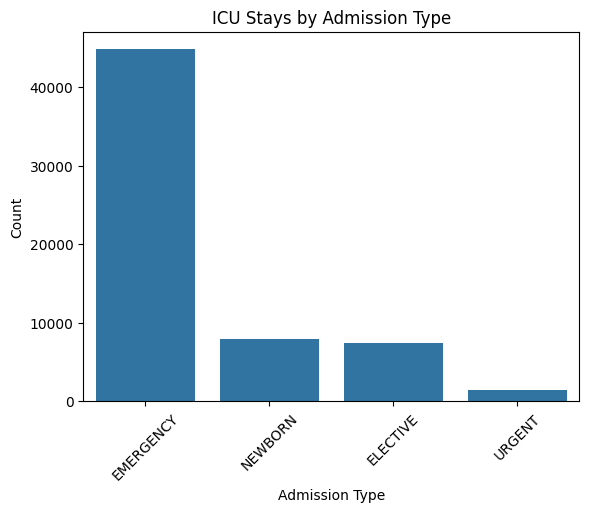

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# ICU Stays by Admission Type
admission_type_counts = merged_data['ADMISSION_TYPE'].value_counts()
sns.barplot(x=admission_type_counts.index, y=admission_type_counts.values)
plt.title('ICU Stays by Admission Type')
plt.xlabel('Admission Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


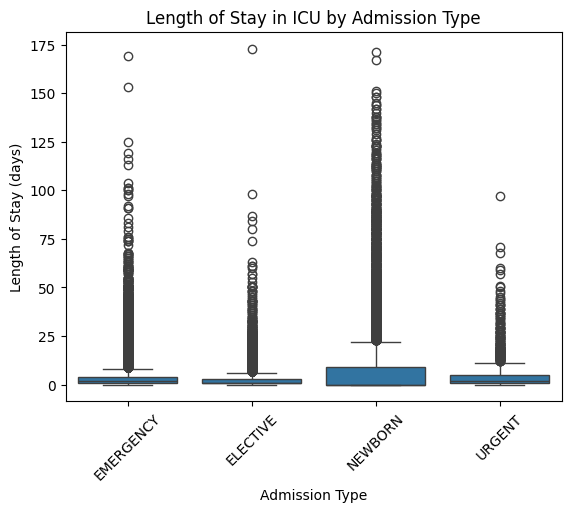

In [6]:
#  length of stay in ICU
merged_data['icu_los'] = (pd.to_datetime(merged_data['OUTTIME']) - pd.to_datetime(merged_data['INTIME'])).dt.days

# Box Plot of Length of Stay in ICU by Admission Type
sns.boxplot(data=merged_data, x='ADMISSION_TYPE', y='icu_los')
plt.title('Length of Stay in ICU by Admission Type')
plt.xlabel('Admission Type')
plt.ylabel('Length of Stay (days)')
plt.xticks(rotation=45)
plt.show()
